# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [45]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
xfeatures = df.columns[:-1]
X = df[xfeatures]
y = df['target']

for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

X.head()
    

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [47]:
#Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y)


In [48]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
40,0.458333,0.0,0.666667,0.433962,0.415525,0.0,0.0,0.541985,0.0,0.241935,1.0,0.25,0.666667
196,0.354167,1.0,0.666667,0.528302,0.239726,0.0,0.5,0.580153,0.0,0.580645,0.5,0.00,0.666667
26,0.625000,1.0,0.666667,0.528302,0.196347,1.0,0.5,0.656489,0.0,0.258065,1.0,0.00,0.666667
197,0.791667,1.0,0.000000,0.292453,0.292237,1.0,0.5,0.702290,0.0,0.032258,0.5,0.50,1.000000
278,0.604167,0.0,0.333333,0.396226,0.440639,1.0,0.0,0.618321,0.0,0.000000,1.0,0.50,0.666667


## 2. Create a standard logistic regression model

In [56]:
#Your code here
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')
model_log= logreg.fit(X_train,y_train)
model_log.coef_

array([[ 0.58380822, -1.8123501 ,  2.77719721, -1.66459405, -2.89483363,
         0.22706441,  1.55747264,  3.38020248, -0.47789271, -2.93239536,
         1.5348955 , -3.10864992, -1.06286745]])

## 3. Write a function to calculate the precision

In [58]:
def precision(y_hat, y):
    y_y_hat = list(zip(y,y_hat))
    tp = sum(1 for i in y_y_hat if i[0]==1 and i[1]==1)
    fp = sum(1 for i in y_y_hat if i[0]==0 and i[1]==0)
    return tp/float(tp+fp)
    #Your code here

## 4. Write a function to calculate the recall

In [59]:
def recall(y_hat, y):
    y_y_hat = list(zip(y,y_hat))
    tp = sum(1 for i in y_y_hat if i[0]==1 and i[1]==1)
    fn = sum(1 for i in y_y_hat if i[0]==1 and i[1]==0)
    return tp/float(tp+fn)
    #Your code here

## 5. Write a function to calculate the accuracy

In [60]:
def accuracy(y_hat, y):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

    #Your code here

## 6. Write a function to calculate the F1-score

In [61]:
def f1_score(y_hat,y):
    precision_score = precision(y_hat,y)
    recall_score = recall(y_hat,y)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)
    #Your code here

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the training and the test set

In [64]:
#Your code here
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

print('Training Precision: ', precision(y_hat_train, y_train))
print('Testing Precision: ', precision(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall(y_hat_train, y_train))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.5714285714285714
Testing Precision:  0.6129032258064516



Training Recall:  0.9256198347107438
Testing Recall:  0.8636363636363636



Training Accuracy:  0.8634361233480177
Testing Accuracy:  0.8157894736842105



Training F1-Score:  0.7066246056782335
Testing F1-Score:  0.7169811320754716


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [65]:
#Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_hat_train, y_train))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.9256198347107438
Testing Precision:  0.8636363636363636



Training Recall:  0.835820895522388
Testing Recall:  0.8260869565217391



Training Accuracy:  0.8634361233480177
Testing Accuracy:  0.8157894736842105



Training F1-Score:  0.8784313725490196
Testing F1-Score:  0.8444444444444444


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different train set sizes. What do you notice?

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))
    training_F1.append(f1_score(y_hat_train,y_train))
    testing_F1.append(f1_score(y_hat_test,y_test))

# 6 lines of code here

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, testing and training accuracy in the third one, and testing and training f1-score in the fourth one.

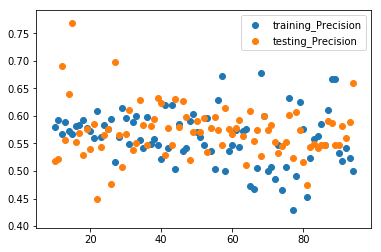

In [74]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label = 'training_Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'testing_Precision')
plt.legend()

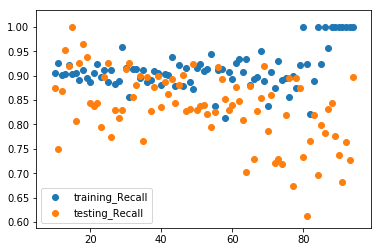

In [75]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label = 'training_Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'testing_Recall')
plt.legend()

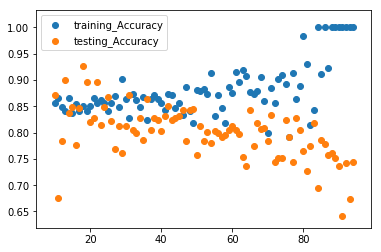

In [76]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'training_Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'testing_Accuracy')
plt.legend()

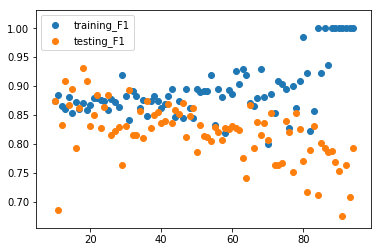

In [77]:
# code for test and train F1-score
plt.scatter(list(range(10,95)), training_F1, label = 'training_F1')
plt.scatter(list(range(10,95)), testing_F1, label = 'testing_F1')
plt.legend()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.